<a href="https://colab.research.google.com/github/ollihansen90/linclassifiers/blob/main/jupyternotebooks/Punktewolke_LinClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Punktewolke "per Hand" klassifizieren
In diesem Notebook wurde ein linearer Klassifizierer implementiert, dessen Gewichte "per Hand" angepasst werden können.

(40, 2)


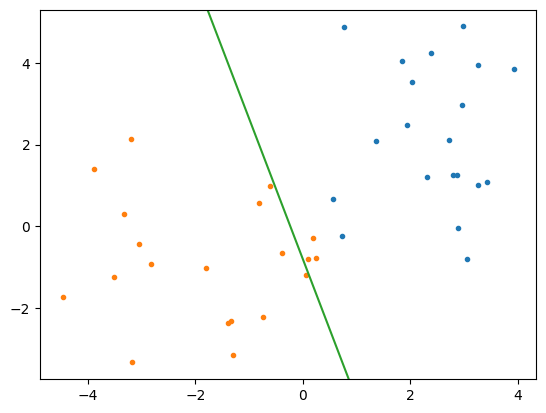

In [10]:
import numpy as np
import matplotlib.pyplot as plt

g = lambda x, w, b: x@w-b
y = lambda x, w, b: -(x*w[0]-b)/w[-1]

def get_loss(data, label, w, b):
    return np.sum((np.abs(np.sign(g(data, w, b))-label))/2)
def get_params(data, label, w, b):
    loss = get_loss(data, label, w, b)
    while loss<3:
        w += 0.5*np.random.randn(2)
        b += 0.5*np.random.randn(1)
        loss = get_loss(data, label, w, b)
        #print(loss)
    return w, b

n1 = 20
n2 = 20
data = np.random.randn(n1+n2,2)
label = np.array(n1*[1]+n2*[-1])
data[:n1] += np.array([2,2])
data[n2:] += np.array([-2,-1])

data = np.array([
    [1.,1.],
    [1.1,1.1],
    [1.2,1.1],
    [1.1,0.9],
    [0.8,0.8],
    [.9,1.1],
    [-1.,1.],
    [-1.,.9],
    [-1.1,.8],
    [-.9,1.],
    [-.8,1.],
    [-1.1,1.1],
])
label = np.array(6*[1]+6*[-1])

data = 1.5*np.random.randn(n1+n2,2)
label = np.array(n1*[1]+n2*[-1])
data[:n1] += np.array([2,2])
data[n2:] += np.array([-2,-1])
print(data.shape)
w = np.array([4.,3.])
b = 1.
out = g(data,w,b)
label = np.sign(out)
# data[:n1] = data[np.argsort(np.abs(out[:n1]))]
# label[:3] *=-1
w, b = get_params(data, label, w, b)
plt.figure()
plt.plot(data[label==1,0], data[label==1,1], ".")
plt.plot(data[label==-1,0], data[label==-1,1], ".")
x1, x2 = plt.gca().get_xbound()
y1, y2 = plt.gca().get_ybound()
plt.xlim([x1,x2])
plt.ylim([y1,y2])
#print(x1,x2)
plt.plot([x1, x2], [y(x1, w, b), y(x2, w, b)])
plt.show()

In [7]:
np.save("data.npy", data)
np.save("label.npy", label)
print(w, b)

[ 9.09822959 -0.90542487] [1.3910449]


## Gewichte anpassen
Im folgenden Notebook können Gewichte für einen linearen Klassifizierer angepasst werden.

*   `ww`: Gewichtsvektor mit zwein Einträgen
*   `bb`: Skalar für den Bias



Ziel ist es, die beiden Klassen voneinander zu trennen (sofern das möglich ist).

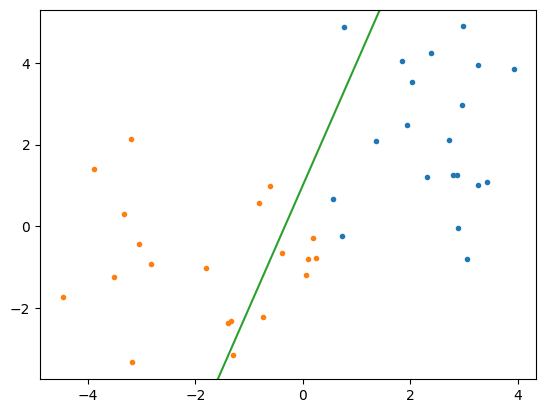

In [20]:
# --- Hier können die Gewichte angepasst werden ---
ww = [3,-1]
bb = -1
# -------------------------------------------------

plt.figure()
plt.plot(data[label==1,0], data[label==1,1], ".")
plt.plot(data[label==-1,0], data[label==-1,1], ".")
x1, x2 = plt.gca().get_xbound()
y1, y2 = plt.gca().get_ybound()
plt.xlim([x1,x2])
plt.ylim([y1,y2])
#print(x1,x2)
plt.plot([x1, x2], [y(x1, ww, bb), y(x2, ww, bb)])
plt.show()